<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fff;">-----------------------------------
    
<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fa9200;">Testing out Indicators across various Stocks to Validate
    
<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fff;">-----------------------------------

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import date, datetime
import os
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import yfinance as yf
from scipy.signal import argrelextrema
from collections import defaultdict
import sqlite3
import warnings
warnings.filterwarnings("ignore")
import Indicators
import Measurement

# Grab Data for Ticker

In [29]:
tickers = Indicators.save_sp500_tickers()
ticker = tickers[0]
ticker = 'PBR'
ticker = 'WDC'
events = ['ihs_event','hs_event','fw_event','rw_event']
df = Indicators.get_ticker(ticker,500)
df

datetime       open       high        low      close  \
0    2022-03-31 09:30:00-04:00  50.130001  50.680000  49.764999  50.259998   
1    2022-03-31 10:30:00-04:00  50.250801  50.540001  49.980000  50.049999   
2    2022-03-31 11:30:00-04:00  50.020401  50.354401  49.884998  50.009998   
3    2022-03-31 12:30:00-04:00  50.000000  50.130001  49.838299  49.950001   
4    2022-03-31 13:30:00-04:00  49.939999  50.160000  49.880001  50.009998   
...                        ...        ...        ...        ...        ...   
3481 2024-03-26 13:30:00-04:00  68.154999  68.870003  68.135002  68.870003   
3482 2024-03-26 14:30:00-04:00  68.860001  69.180000  68.120003  68.209999   
3483 2024-03-26 15:30:00-04:00  68.214996  68.595001  68.019997  68.139999   
3484 2024-03-27 09:30:00-04:00  69.000000  69.019997  67.110001  67.114998   
3485 2024-03-27 10:30:00-04:00  67.129997  67.400002  66.425003  67.040001   

       volume  dividends  stock splits                date ticker  
0      556587        0.0           0.0 2022-03-31 09:30:00    WDC  
1      324177        0.0           0.0 2022-03-31 10:30:00    WDC  
2      259048        0.0           0.0 2022-03-31 11:30:00    WDC  
3      263985        0.0           0.0 2022-03-31 12:30:00    WDC  
4      283975        0.0           0.0 2022-03-31 13:30:00    WDC  
...       ...        ...           ...                 ...    ...  
3481   978724        0.0           0.0 2024-03-26 13:30:00    WDC  
3482  1299516        0.0           0.0 2024-03-26 14:30:00    WDC  
3483  1394129        0.0           0.0 2024-03-26 15:30:00    WDC  
3484  1098911        0.0           0.0 2024-03-27 09:30:00    WDC  
3485   917682        0.0           0.0 2024-03-27 10:30:00    WDC  

[3486 rows x 10 columns]

# Add SMA, Min/Max, Events

In [30]:
SMAs = [5,30,60,90]
smoothing = 10
window = 8

df = Indicators.get_sma(df,SMAs)
minmax = Indicators.get_max_min(df, smoothing, window)
invhs = Indicators.find_IHS(minmax).reset_index(drop=True)
rw = Indicators.find_RW(minmax,.03).reset_index(drop=True)
fw = Indicators.find_FW(minmax,.03).reset_index(drop=True)
df

datetime       open       high        low      close  \
0    2022-03-31 09:30:00-04:00  50.130001  50.680000  49.764999  50.259998   
1    2022-03-31 10:30:00-04:00  50.250801  50.540001  49.980000  50.049999   
2    2022-03-31 11:30:00-04:00  50.020401  50.354401  49.884998  50.009998   
3    2022-03-31 12:30:00-04:00  50.000000  50.130001  49.838299  49.950001   
4    2022-03-31 13:30:00-04:00  49.939999  50.160000  49.880001  50.009998   
...                        ...        ...        ...        ...        ...   
3481 2024-03-26 13:30:00-04:00  68.154999  68.870003  68.135002  68.870003   
3482 2024-03-26 14:30:00-04:00  68.860001  69.180000  68.120003  68.209999   
3483 2024-03-26 15:30:00-04:00  68.214996  68.595001  68.019997  68.139999   
3484 2024-03-27 09:30:00-04:00  69.000000  69.019997  67.110001  67.114998   
3485 2024-03-27 10:30:00-04:00  67.129997  67.400002  66.425003  67.040001   

       volume  dividends  stock splits                date ticker       SMA5  \
0      556587        0.0           0.0 2022-03-31 09:30:00    WDC        NaN   
1      324177        0.0           0.0 2022-03-31 10:30:00    WDC        NaN   
2      259048        0.0           0.0 2022-03-31 11:30:00    WDC        NaN   
3      263985        0.0           0.0 2022-03-31 12:30:00    WDC        NaN   
4      283975        0.0           0.0 2022-03-31 13:30:00    WDC  50.055999   
...       ...        ...           ...                 ...    ...        ...   
3481   978724        0.0           0.0 2024-03-26 13:30:00    WDC  68.462000   
3482  1299516        0.0           0.0 2024-03-26 14:30:00    WDC  68.406000   
3483  1394129        0.0           0.0 2024-03-26 15:30:00    WDC  68.278000   
3484  1098911        0.0           0.0 2024-03-27 09:30:00    WDC  68.098000   
3485   917682        0.0           0.0 2024-03-27 10:30:00    WDC  67.875000   

          SMA30      SMA60      SMA90  
0           NaN        NaN        NaN  
1           NaN        NaN        NaN  
2           NaN        NaN        NaN  
3           NaN        NaN        NaN  
4           NaN        NaN        NaN  
...         ...        ...        ...  
3481  64.599903  62.267998  62.418952  
3482  64.880903  62.387582  62.462619  
3483  65.148903  62.506582  62.503619  
3484  65.370070  62.610832  62.538397  
3485  65.581070  62.713332  62.574897  

[3486 rows x 14 columns]

# Loop Thru Tickers to find FW

In [136]:
i = 0
fw = pd.DataFrame()
while len(rw)<1 and i<500:
    ticker = tickers[i]
    df = Indicators.get_ticker(ticker,500)
    df = Indicators.get_sma(df,SMAs)
    minmax = Indicators.get_max_min(df, smoothing, window)
    invhs = Indicators.find_IHS(minmax).reset_index(drop=True)
    hs = Indicators.find_HS(minmax).reset_index(drop=True)
    fw = Indicators.find_FW(minmax,.03).reset_index(drop=True)
    rw = Indicators.find_RW(minmax,.03).reset_index(drop=True)
    i += 1
fw

Empty DataFrame
Columns: []
Index: []

# Plot Data

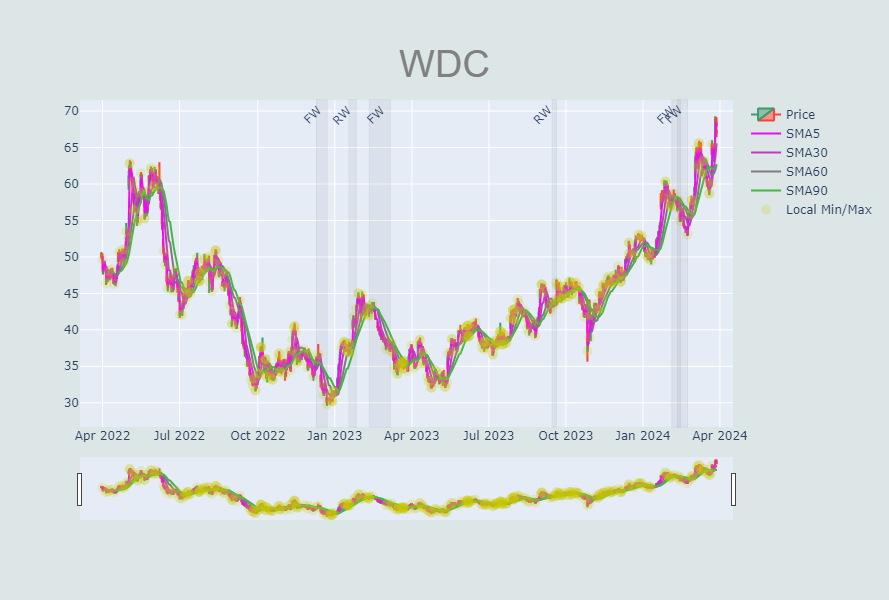

In [31]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax['date'],
                y=minmax['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.2)
                        ))
# iterate through the shaded regions dataframe

for index, row in invhs.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='IHS',
            annotation_textangle=-45
        )   
# iterate through the shaded regions dataframe
for index, row in fw.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='FW',
            annotation_textangle=-45
        )  
for index, row in rw.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='RW',
            annotation_textangle=-45
        )  
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Testing out Toggle for Indicators

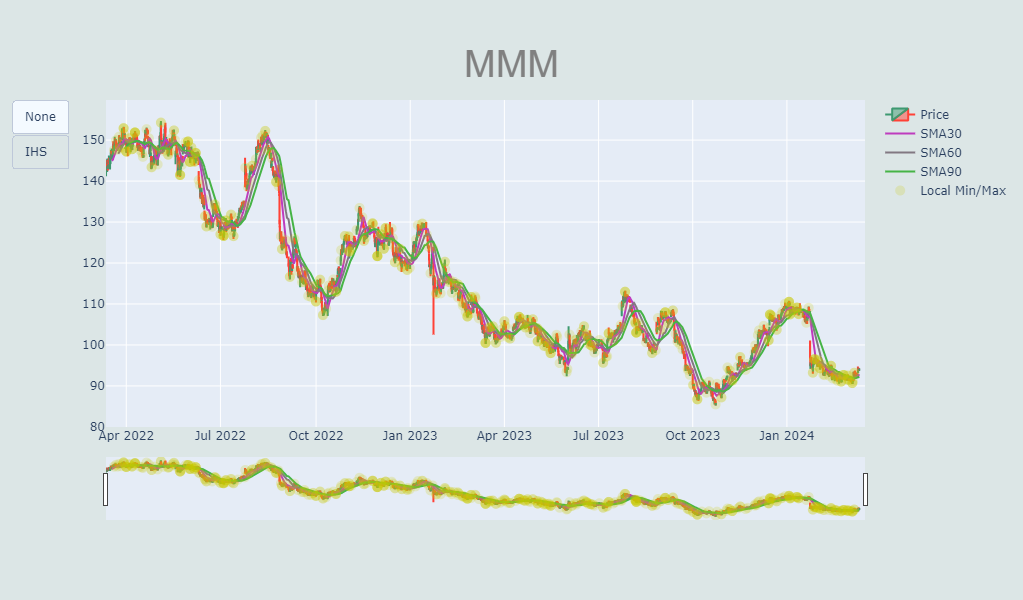

In [14]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax['date'],
                y=minmax['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.2)
                        ))
# iterate through the shaded regions dataframe

hs_dict = {}
for index, row in invhs.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    hs = [dict(type="vrect",
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='IHS'
        )]
    hs_dict[index]=hs
    
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="None",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="IHS",
                     method="relayout",
                     args=["shapes", hs_dict[0]])
            ],
        )
    ]
)
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Zoom in on Specific Event

In [45]:
df2 = Indicators.main(ticker,500,SMAs,smoothing,window)

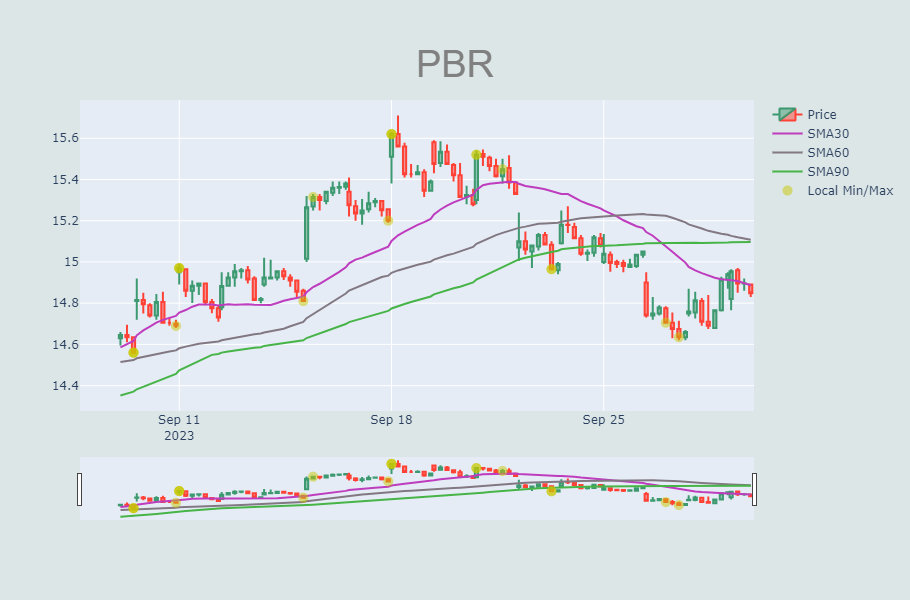

In [46]:
eventType = 'rw_event'
ID = list(df2[df2.date==df2[df2[eventType]==1].date.min()].index)[0]
chartdf = df2.iloc[ID-10:ID+95].copy()
minmax2 = minmax[(minmax.date>=chartdf.date.min())&(minmax.date<=chartdf.date.max())].copy()
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=chartdf['date'],
                open=chartdf['open'],
                high=chartdf['high'],
                low=chartdf['low'],
                close=chartdf['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=chartdf['date'],
                y=chartdf['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax2['date'],
                y=minmax2['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.5)
                        ))
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Build Inidcators and Group by Change During Event

In [32]:
M = 80
K = 500
window = 5
smoothing = 5
events = {'ihs_event':'bull','hs_event':'bear','fw_event':'bull','rw_event':'bear'}

df3 = Measurement.combine_events(events,SMAs,smoothing,window,M,K)
df3.reset_index(inplace=True,drop=True)
#df3['date'] = pd.to_datetime(df.datetime, errors='coerce').dt.tz_localize(None)
df3.groupby([x for x in df3.columns if '_event' in x]).lower_chng.mean().reset_index()

AttributeError: module 'Measurement' has no attribute 'combine_events'

In [18]:
"""
from itertools import chain
for event,btype in events.items():
    kList = list(df3[(df3[event]==1)&(df3[event].shift(1)==0)].index)
    dfList = list(chain(*[range(i+1,i+M,1) for i in kList]))
    df3[event] = np.where(df3.index.isin(dfList),-1,df3[event])
    if btype == 'bull':
        df3[event] = np.where((df3['SMA5'] > df3['SMA60'])  &
                (df3[event] == -1), -2, df3[event]) 
    else:
        df3[event] = np.where((df3['SMA5'] < df3['SMA60'])  &
                (df3[event] == -1), -2, df3[event])
    #df3[event] = np.where((df3[event] == -2) & (df3[event] == -1), 2, df3[event])
    kList2 = list(df3[(df3[event]==-2)&(df3[event].shift(1)==-1)].index)
    dfList2 = [i+K for i in kList2]
    df3[event] = np.where(df3.index.isin(dfList2),2,df3[event])
    
    #df3[event] = np.where((df3[event].shift(1)==-1)&(df3[event]!=-1),-2,df3[event])
"""
df3 = final.copy()
df3.groupby(['fw_event']).size()

fw_event
-2        948
-1      76999
 0    1605881
 1      45275
dtype: int64

In [27]:
event = 'rw_event'
if [val for key, val in events.items() if event in key][0] == 'bull':
    final = df3.groupby(['ticker',event]).upper_chng.describe().reset_index()
else:
    final = df3.groupby(['ticker',event]).lower_chng.describe().reset_index()

final2 = pd.pivot_table(final[(final.ticker.isin(final[final[event].isin([-2])].ticker))&(final[event].isin([-2,0]))],
               values = ['count','50%'], 
               index = ['ticker'],
               columns = [event],
               aggfunc = 'mean'
              )
final2.columns = [str(x) + str(y) for x,y in final2.columns]
if [val for key, val in events.items() if event in key][0] == 'bull':
    final2['Indicator'] = np.where(final2['50%-2'] > final2['50%0'], 1, 0)
else:
    final2['Indicator'] = np.where(final2['50%-2'] < final2['50%0'], 1, 0)
    
final3 = final2[abs(final2['50%-2']-final2['50%0']) > 0.01].copy()
final3.reset_index(inplace=True)
#final3['Indicator'] = final3['Indicator']*final3['count-2']
#print(sum(final3['Indicator']*final3['count-2']))
#print(final3['count-2'].sum())
eventSuccess = sum(final3['Indicator']*final3['count-2'])/final3['count-2'].sum()
print('Event {} Percentage of Success: {}'.format(event,"{:.2%}".format(eventSuccess)))
print(df3.date.min())
final3
#final2 = final[(final.ticker.isin(final[final[event].isin([-2])].ticker))&(final[event].isin([-2,0]))].copy()
#final2[final2.ticker.str.match('^M.*')]

Event rw_event Percentage of Success: 76.65%
2022-03-30 09:30:00


ticker     50%-2      50%0  count-2  count0  Indicator
0      AAL -0.146350 -0.070453      4.0  2899.0          1
1     AAPL -0.081863 -0.033231      1.0  3315.0          1
2     ABNB -0.086102 -0.066102      5.0  2839.0          1
3     ADBE -0.028963 -0.040045      1.0  3314.0          0
4      ADI -0.064900 -0.035108      5.0  2833.0          1
..     ...       ...       ...      ...     ...        ...
306   XRAY -0.060733 -0.049014      2.0  3054.0          1
307    XYL -0.061949 -0.029706      4.0  2917.0          1
308    YUM -0.064595 -0.025277      4.0  2884.0          1
309    ZBH -0.053498 -0.027983      4.0  2937.0          1
310   ZBRA -0.000302 -0.055906      1.0  3305.0          0

[311 rows x 6 columns]

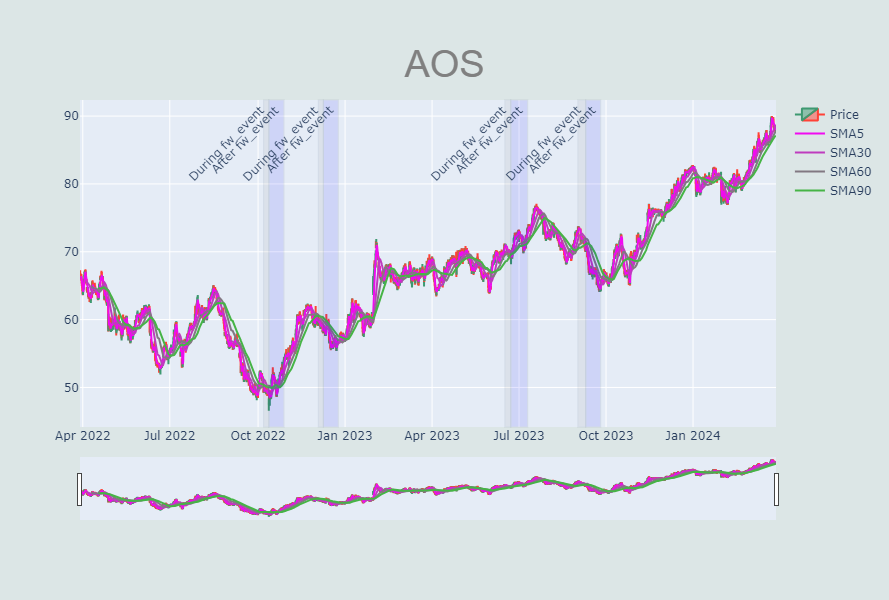

In [26]:
#event = 'rw_event'
#ticker = 'AAL'
ticker = final3[final3.Indicator==1].ticker.sample(1).tolist()
ticker = ticker[0]
df = df3[df3.ticker==ticker].copy()
df[event+'_ranges'] = np.where(df[event] != df[event].shift(1), 1, 0)
df[event+'_ranges'] = df[event+'_ranges'].cumsum()
df[event+'_start'] = df.groupby([event+'_ranges'])['datetime'].transform('min')
df[event+'_end'] = df.groupby([event+'_ranges'])['datetime'].transform('max')
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
    
# iterate through the shaded regions dataframe
rw = df.groupby([event+'_start',event+'_end'])[event].mean().reset_index()
rw = rw[rw[event].isin([1,-1])].reset_index(drop=True)
eventName = {1:'During {}'.format(event),-1:'After {}'.format(event),0:'No {}'.format(event)}
eventList = list(rw[event])
eventList = [eventName.get(item,item)  for item in eventList]
for index, row in rw.iterrows():
    eventValue = eventList[index]
    # retrieve the dates
    if re.match('During .*',eventValue):
        fcolor = "grey"
    else:
        fcolor = "blue"
    start = row[event+'_start']
    end = row[event+'_end']
    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor=fcolor,
            opacity=0.1,
            line_width=1,
            annotation_text=eventValue,
            annotation_textangle=-45
        )  
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()